# PHYS 4247 Plotting Tutorial

## Author: Christopher Evans (`cevans216@gatech.edu`)

This tutorial will use a [Jupyter notebook](https://jupyter.org/) for plotting in Python using [matplotlib](https://matplotlib.org/) and [numpy](https://numpy.org/). This tutorial runs on a publically hosted server so it can be used without any setup on your computer. For details on setting up a local Jupyter installation, see the [documentation](https://jupyter-notebook.readthedocs.io/en/stable/).

## Boilerplate setup

This next cell of code is required any time you are using matplotlib/numpy in a notebook. 

The first two lines just import the packages for matplotlib.pyplot (plt) and numpy (np). 

The third line is only required when using matplotlib in a notebook environment in order for plots to be rendered correctly.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Trigonometric Functions

Let's start by plotting a few trigonometric functions in the range $ \theta \in (0, 2\pi)$. This linem of code will generate a list of 10,000 evenly spaced $\theta$ values in this range.



In [2]:
theta = np.linspace(0, 2*np.pi, 10000)
print(theta)

[0.00000000e+00 6.28381369e-04 1.25676274e-03 ... 6.28192854e+00
 6.28255693e+00 6.28318531e+00]



Now we create a new figure with `plt.figure()` and plot $\sin\theta$ with `plt.plot()`.


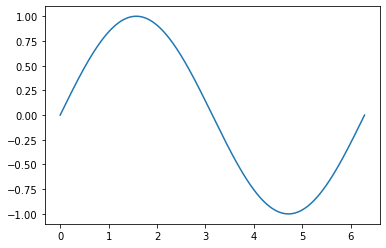

In [3]:
fig = plt.figure()
plt.plot(theta, np.sin(theta));

We can also add grid lines and axis labels (using LaTeX)

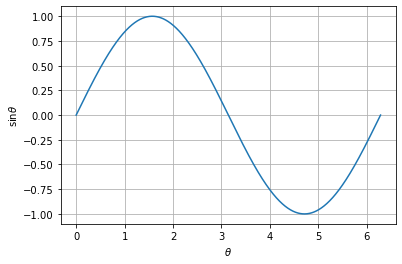

In [4]:
fig = plt.figure()
plt.plot(theta, np.sin(theta))
plt.grid(True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\sin\theta$');

It is also possible to plot multiple functions on the same figure and label them with a legend

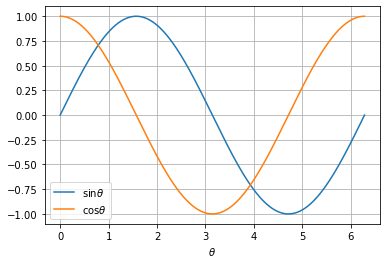

In [5]:
fig = plt.figure()
plt.plot(theta, np.sin(theta), label=r'$\sin\theta$')
plt.plot(theta, np.cos(theta), label=r'$\cos\theta$')
plt.grid(True)
plt.xlabel(r'$\theta$')
plt.legend();

## Parametric Solution for Matter Dominated Universe

Consider the case $k > 0$ with a universe containing only matter ($p = 0$). Show that the parameteric solution:

$$ a(\theta) = \frac{4\pi G \rho_0}{3k} \left( 1 - \cos\theta \right) $$

$$ t(\theta) = \frac{4\pi G \rho_0}{3 k^{3/2}} \left( \theta - \sin\theta \right) $$

solves this equation, where $\theta$ is a variable that runs from $0$ to $2\pi$.

First, make the solution dimensionless by defining

$$ \alpha = \frac{4\pi G \rho_0}{3} $$

and setting $k = +1$, making the solution

$$ a (\theta) = \alpha \left( 1 - \cos\theta \right) $$

$$ t (\theta) = \alpha \left( \theta - \sin\theta \right) $$

Using the variable `theta` that we defined above, we can now easily plot this solution.

In [6]:
a = 1 - np.cos(theta)
t = theta - np.sin(theta)

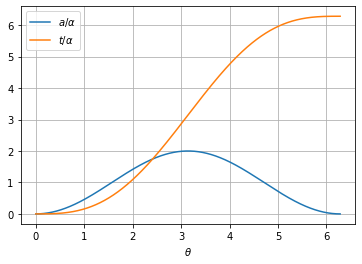

In [7]:
fig = plt.figure()
plt.plot(theta, a, label=r'$a/\alpha$')
plt.plot(theta, t, label=r'$t/\alpha$')
plt.xlabel(r'$\theta$')
plt.grid(True)
plt.legend();

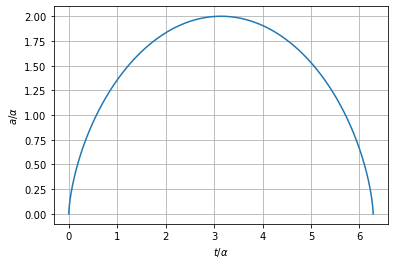

In [8]:
fig = plt.figure()
plt.plot(t, a)
plt.xlabel(r'$t/\alpha$')
plt.ylabel(r'$a/\alpha$')
plt.grid(True);

Using the quantity $\alpha$, the Friedmann equation becomes

$$ \left( \frac{\dot a}{a} \right)^2 = \frac{8 \pi G \rho}{3} - \frac{k}{a^2}  \implies \dot a^2 = \frac{2}{(a/\alpha)} - 1 $$

To avoid division by zero at $a = 0$, we can multiply through by $(a/\alpha)^2$:

$$ (a/\alpha)^2 \dot a^2 = 2 (a/\alpha) - (a/\alpha)^2 $$

We can numerically calculate $\dot a$ from the variables `a` and `t` using the Numpy function `np.gradient(f(x), x)`.

In [9]:
adot = np.gradient(a, t)

Then we can compare the left and right hand sides numerically to see if this is a solution

In [10]:
lhs = a**2 * adot**2
rhs = 2*a - a**2

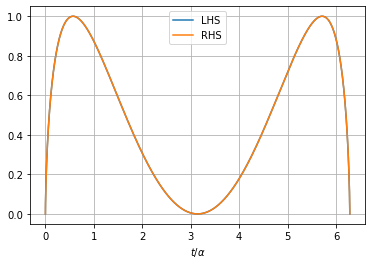

In [11]:
fig = plt.figure()
plt.plot(t, lhs, label=r'LHS')
plt.plot(t, rhs, label=r'RHS')
plt.xlabel(r'$t/\alpha$')
plt.grid()
plt.legend();

In [12]:
print('max error:')
print(np.amax(np.abs(rhs - lhs)))

max error:
5.264707517506925e-07
